# Trabalho Final - Machine Learning

* Arthur Bernardes Suematsu
* Eduardo Henrique Silva Souza
* Gustavo Almeida Brezzi
* Wagner Sanches Gonçalves

Neste trabalho, como parte do time de analistas da Quantum Finance, vocês deverão explorar uma base de dados originalmente utilizada para classificação de score de crédito, disponível no Kaggle (https://www.kaggle.com/datasets/parisrohan/credit-score-classification), utilizando técnicas de Análise Exploratória de Dados (EDA) e algoritmos de Machine Learning supervisionados. 


O objetivo é aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da análise da base de dados.

**Modelo de Classificação Supervisionada**


Desenvolver um modelo de classificação supervisionada para prever a classificação de crédito dos indivíduos presentes na base.


Passos esperados:

1. Realizar uma análise exploratória dos dados (EDA) para entender as características principais da base e as relações entre variáveis; 2 pontos

2. Implementar um pipeline de modelo de classificação usando Random Forest, XGBoost e LightGBM. Use GridSearch para otimizar os parametros de cada modelo; 4 pontos

3. Avaliar os resultados utilizando a métrica mais adequada e **justifique** sua escolha; 2 pontos

4. Apresentar os resultados, indicando a métrica no conjunto de treino (train.csv) e explicar como o modelo pode ser utilizado para decisões financeiras. 2 pontos


Entregáveis:

1. Este jupyter notebook executado e com os resultados aparentes (não serão aceitoa outros formatos)

### Importação das bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

### Carregamento e exploração inicial dos dados

In [ ]:
train_data = pd.read_csv("../data/raw/credit_score_train.csv")
test_data = pd.read_csv("../data/raw/credit_score_test.csv")

# Verificando as dimensões dos dados
print(f"Dimensões do conjunto de treino: {train_data.shape}")
print(f"Dimensões do conjunto de teste: {test_data.shape}")

Dimensões do conjunto de treino: (100000, 28)
Dimensões do conjunto de teste: (50000, 27)


In [ ]:
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
train_data.columns.tolist()


['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [ ]:
test_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
test_data.columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [ ]:
# Observando a diferença entre os conjuntos (teste não tem Credit_Score)
train_cols = set(train_data.columns.tolist())
test_cols = set(test_data.columns.tolist())
print("Colunas apenas no treino:", train_cols - test_cols)
print("Colunas apenas no teste:", test_cols - train_cols)

Colunas apenas no treino: {'Credit_Score'}
Colunas apenas no teste: set()


### Análise exploratória de dados (EDA)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
train_data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
# Verificando a distribuição da variável alvo
print("\nDistribuição da variável alvo (Credit_Score):")
print(train_data['Credit_Score'].value_counts())
print(train_data['Credit_Score'].value_counts(normalize=True) * 100)


Distribuição da variável alvo (Credit_Score):
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64


Pré-processamento

In [ ]:
def duplicate_values(df):
    print("Validação de duplicação.")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("Existem", num_duplicates, "duplicadas.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicadas excluidas")
    else:
        print("Não existem duplicadas")

duplicate_values(train_data)
duplicate_values(test_data)

Validação de duplicação.
Não existem duplicadas
Validação de duplicação.
Não existem duplicadas


In [ ]:
# Verificando valores inválidos ou inconsistentes em colunas numéricas
print("Verificando valores numéricos inválidos...")
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_cols:
    invalid_values = train_data[~train_data[col].astype(str).str.replace('.', '').str.replace('-', '').str.isdigit()]
    if not invalid_values.empty:
        print(f"Coluna {col} contém valores não numéricos: {invalid_values[col].unique()}")

Verificando valores numéricos inválidos...
Coluna Monthly_Inhand_Salary contém valores não numéricos: [nan]
Coluna Num_Credit_Inquiries contém valores não numéricos: [nan]


Aqui pudemos notar que existem valores que não fazem sentindo para o campo Idade

In [ ]:
train_data['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [ ]:
train_data['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

Então criamos uma função para limpar e converter valores

In [ ]:
# Função para limpar e converter valores
def clean_data(df):
    df_copy = df.copy()

    # colunas que não serão usadas
    df_copy = df_copy.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)
   
    # Tratando valores especiais como NaN
    for col in df_copy.columns:
        df_copy[col] = df_copy[col].replace('_', np.nan)
        df_copy[col] = df_copy[col].replace('!@9#%8', np.nan)
        df_copy[col] = df_copy[col].replace('#F%$D@*&8', np.nan)
    # preenche o na do Credit_Mix com desconhecido
    df_copy['Credit_Mix'].fillna('Unknown', inplace=True)
    df_copy['Credit_Mix'] = df_copy['Credit_Mix'].astype('object')

    # Tratando valores especiais na coluna Occupation
    df_copy['Occupation'] = df_copy['Occupation'].replace('_______', 'Other')
    df_copy.loc[pd.isna(df_copy['Occupation']), 'Occupation'] = 'Other'
   
    # Limpando e convertendo a coluna Age para numérico
    df_copy['Age'] = pd.to_numeric(df_copy['Age'].astype(str).str.replace('_', ''), errors='coerce')
    # Substituir valores inválidos (negativos ou muito altos) por NaN
    df_copy.loc[df_copy['Age'] < 0, 'Age'] = np.nan
    df_copy.loc[df_copy['Age'] > 100, 'Age'] = np.nan

    # Preencher NaN com a mediana das idades válidas
    mediana_idade = df_copy['Age'].median()
    df_copy['Age'].fillna(mediana_idade, inplace=True)
    
    # Convertendo Credit_History_Age para numérico (em meses)
    def convert_credit_history(x):
        if pd.isna(x) or x == 'NA':
            return np.nan
        try:
            years = 0
            months = 0
            if 'Years' in str(x):
                years = int(str(x).split('Years')[0].strip())
            if 'Months' in str(x):
                months = int(str(x).split('Months')[0].split('and')[-1].strip())
            return years * 12 + months
        except:
            return np.nan
           
    df_copy['Credit_History_Age'] = df_copy['Credit_History_Age'].apply(convert_credit_history)
        # Preencher NaN com a mediana dos valores válidos de Credit_History_Age
    mediana_credit_history = df_copy['Credit_History_Age'].median()
    df_copy['Credit_History_Age'].fillna(mediana_credit_history, inplace=True)
   
    
    # Convertendo colunas numéricas
    numeric_cols = ['Age','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Credit_History_Age',
                  'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 
                  'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                  'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                  'Amount_invested_monthly', 'Monthly_Balance']
    
    for col in numeric_cols:
        # Primeiro limpar quaisquer caracteres não numéricos
        if col in df_copy.columns:
            # Converter para string, remover caracteres não numéricos exceto ponto decimal
            df_copy[col] = df_copy[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True)
            # Converter para float
            df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
    
    return df_copy

In [ ]:
# Aplicando a limpeza aos conjuntos de dados
train_data = clean_data(train_data)
test_data = clean_data(test_data)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  float64
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Num_Bank_Accounts         50000 non-null  int64  
 4   Num_Credit_Card           50000 non-null  int64  
 5   Interest_Rate             50000 non-null  int64  
 6   Num_of_Loan               50000 non-null  int64  
 7   Delay_from_due_date       50000 non-null  int64  
 8   Num_of_Delayed_Payment    46502 non-null  float64
 9   Num_Credit_Inquiries      48965 non-null  float64
 10  Credit_Mix                50000 non-null  object 
 11  Outstanding_Debt          50000 non-null  float64
 12  Credit_Utilization_Ratio  50000 non-null  float64
 13  Credit_History_Age        50000 non-null  float64
 14  Paymen

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  int64  
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   float64
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [ ]:
# Usando dicionário para mapear categorias para valores numéricos
mapeamento = {'Good': 2, 'Standard': 1, 'Poor': 0}

# Aplicando o mapeamento 
train_data['Credit_Score'] = train_data['Credit_Score'].map(mapeamento)

In [ ]:
# Verificando valores nulos após limpeza
print("\nValores nulos após limpeza (treino):")
print(train_data.isnull().sum())
print("\nValores nulos após limpeza (teste):")
print(test_data.isnull().sum())


Valores nulos após limpeza (treino):
Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

Valores nulos após limpeza (teste):
Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date  

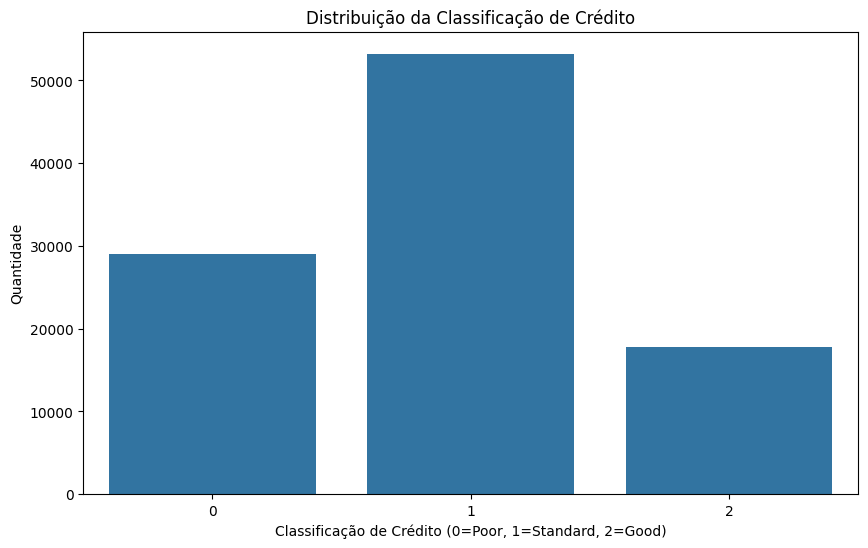

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Credit_Score', data=train_data)
plt.title('Distribuição da Classificação de Crédito')
plt.ylabel('Quantidade')
plt.xlabel('Classificação de Crédito (0=Poor, 1=Standard, 2=Good)')
plt.show()

[]

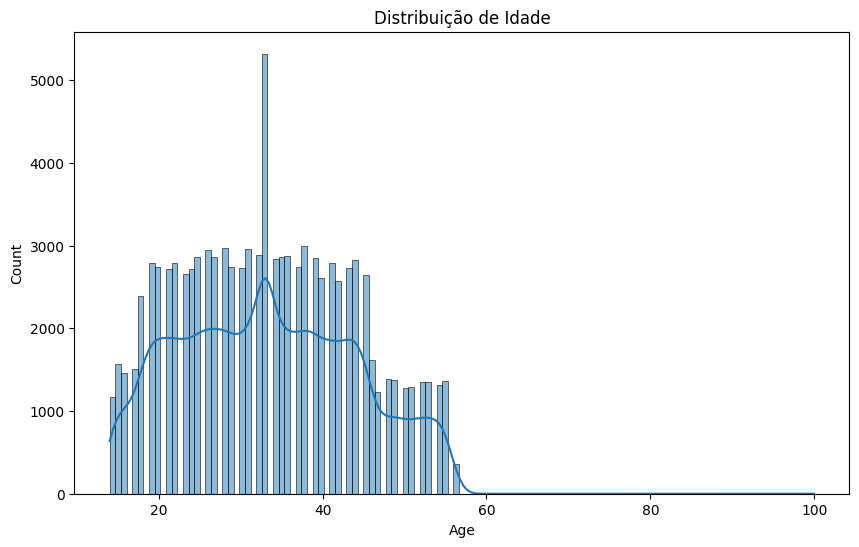

In [ ]:
# Verificando a distribuição da idade
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], kde=True)
plt.title('Distribuição de Idade')
plt.plot()

In [ ]:
train_data['Credit_Mix'].unique()

array(['Unknown', 'Good', 'Standard', 'Bad'], dtype=object)

#### Quanto maior o histórico de crédito melhor a classificação

[]

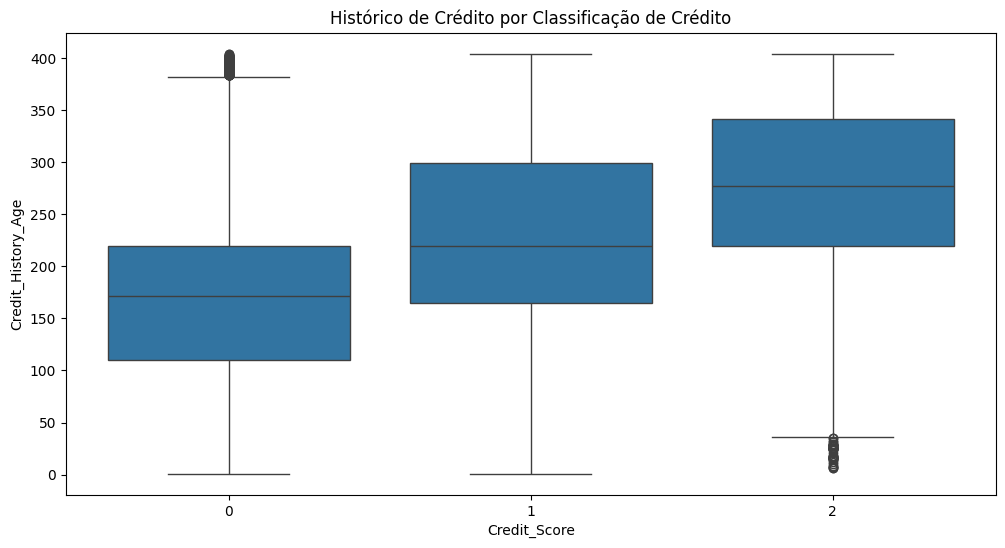

In [ ]:
# Explorando relação entre histórico de crédito e score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=train_data)
plt.title('Histórico de Crédito por Classificação de Crédito')
plt.plot()

Credit_Score                1.000000
Credit_History_Age          0.371374
Age                         0.157543
Credit_Utilization_Ratio    0.045793
Amount_invested_monthly     0.011631
Annual_Income               0.008015
Total_EMI_per_month         0.004382
Monthly_Balance            -0.001585
Interest_Rate              -0.002591
Num_Credit_Card            -0.007624
Num_of_Delayed_Payment     -0.008103
Num_Bank_Accounts          -0.010491
Num_of_Loan                -0.010915
Num_Credit_Inquiries       -0.011235
Outstanding_Debt           -0.386525
Delay_from_due_date        -0.431591
Name: Credit_Score, dtype: float64


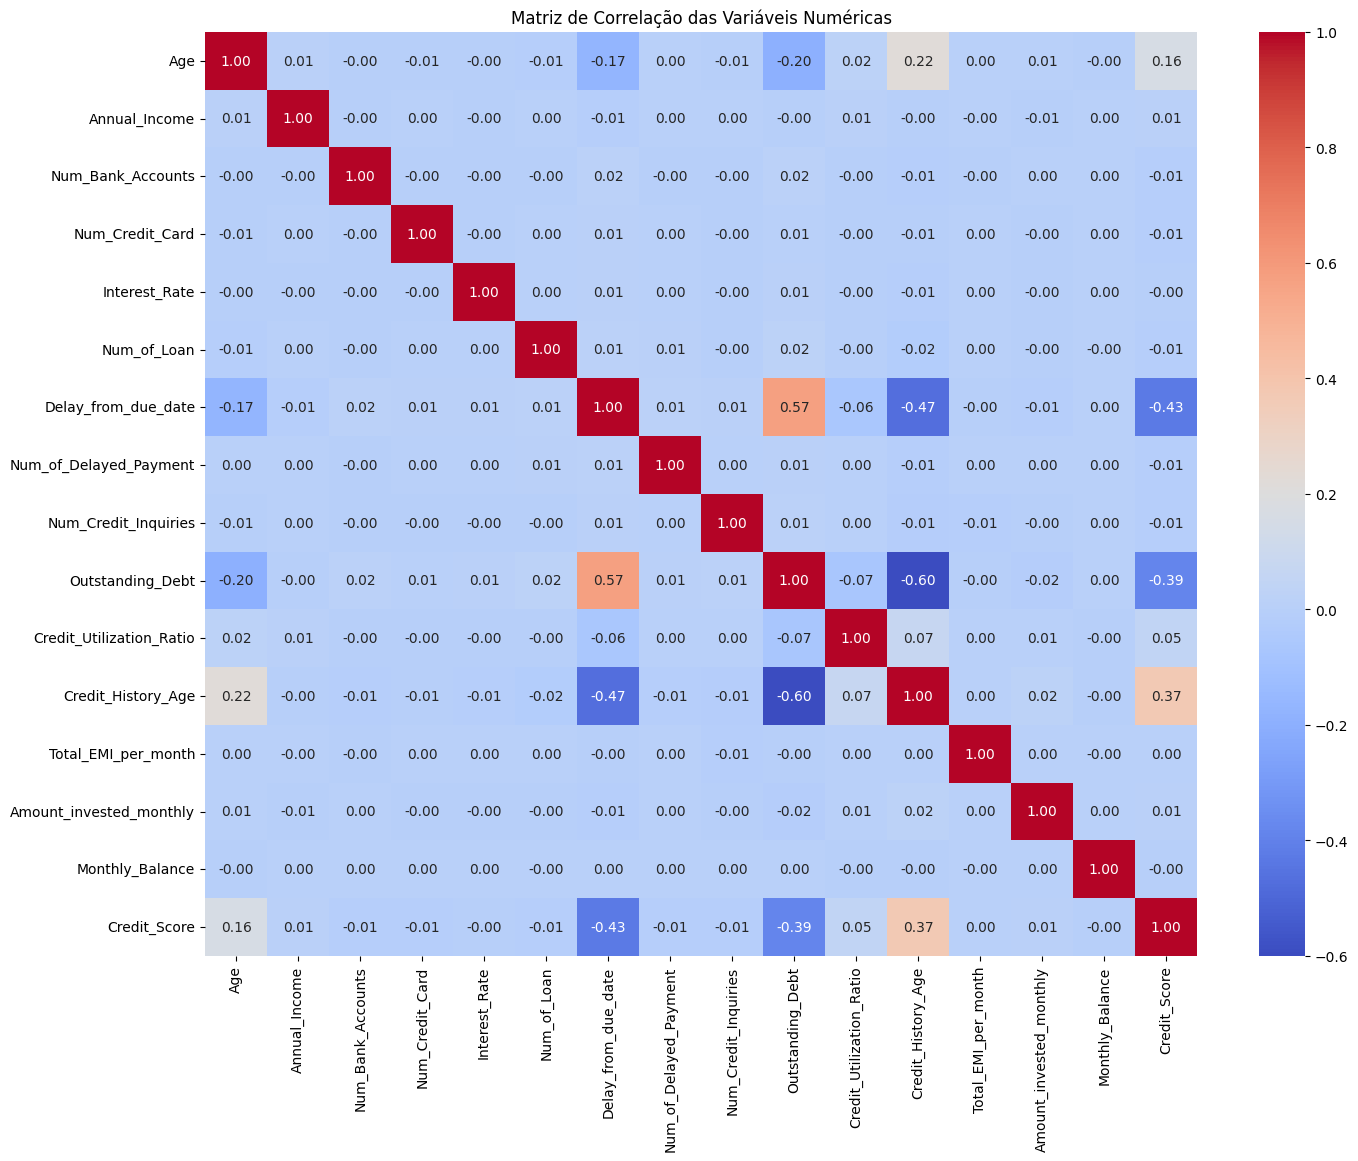

In [ ]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = train_data[numeric_cols].corr()

# Visualizando as correlações 
correlacoes_com_target = corr_matrix['Credit_Score'].sort_values(ascending=False)
print(correlacoes_com_target)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.savefig('matriz_correlacao.png')
plt.show()

In [ ]:
print(train_data['Delay_from_due_date'].unique())

[ 3 -1  5  6  8  7 13 10  0  4  9  1 12 11 30 31 34 27 14  2 -2 16 17 15
 23 22 21 18 19 52 51 48 53 26 43 28 25 20 47 46 49 24 61 29 50 58 45 59
 55 56 57 54 62 65 64 67 36 41 33 32 39 44 42 60 35 38 -3 63 40 37 -5 -4
 66]


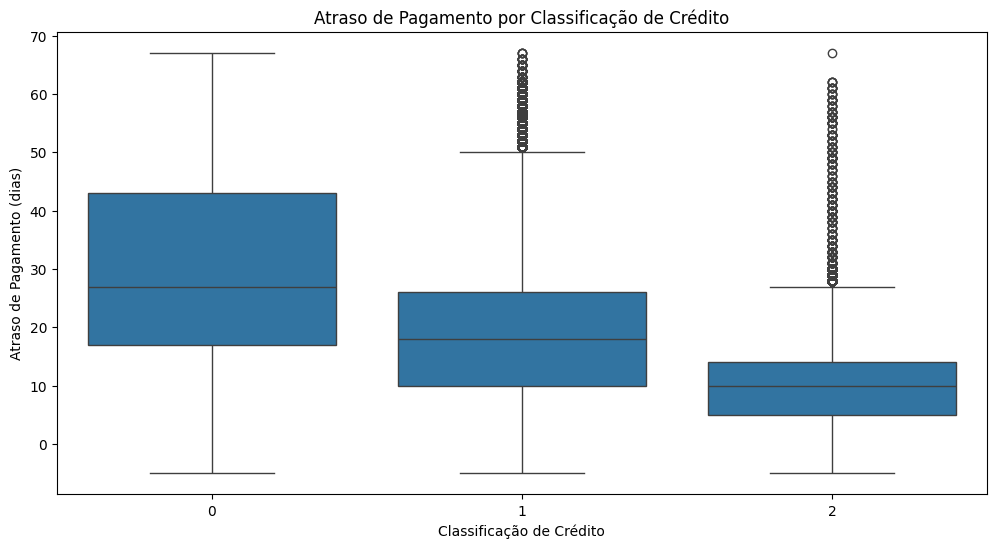

In [ ]:
# Explorando a relação entre atraso de pagamento e pontuação de crédito
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=train_data)
plt.title('Atraso de Pagamento por Classificação de Crédito')
plt.xlabel('Classificação de Crédito')
plt.ylabel('Atraso de Pagamento (dias)')
plt.show()


Isso mostra que o atraso no pagamento auxlia na decisão de aprovar ou não o crédito

In [ ]:
print(train_data['Outstanding_Debt'].unique())

[ 809.98  605.03 1303.01 ...  620.64 3571.7   502.38]


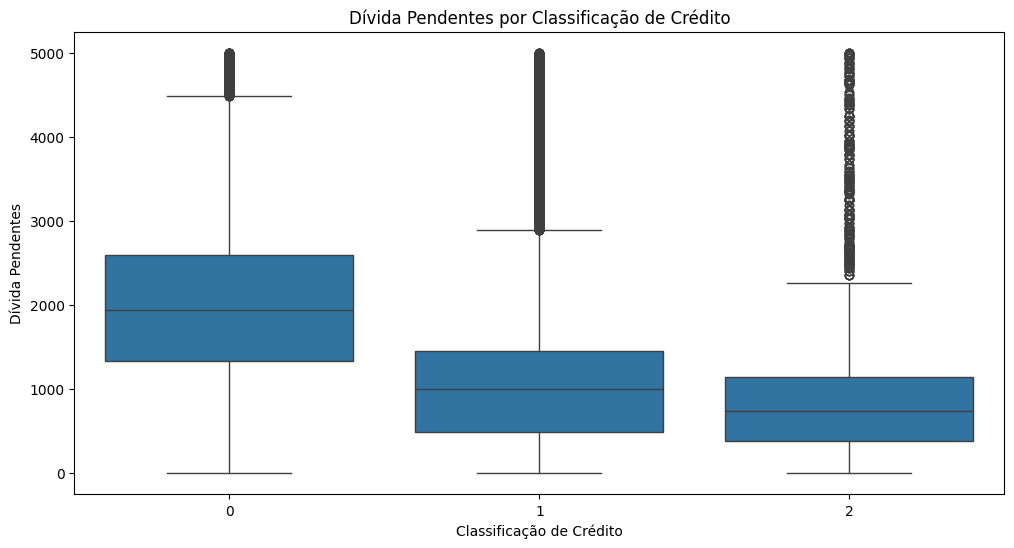

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=train_data)
plt.title('Dívida Pendentes por Classificação de Crédito')
plt.xlabel('Classificação de Crédito')
plt.ylabel('Dívida Pendentes')
plt.show()


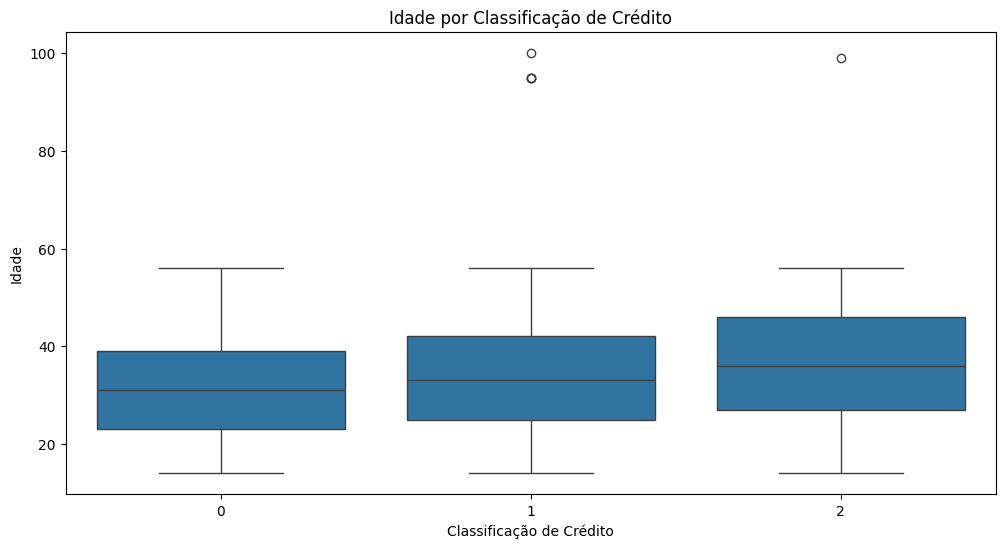

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Age', data=train_data)
plt.title('Idade por Classificação de Crédito')
plt.xlabel('Classificação de Crédito')
plt.ylabel('Idade')
plt.show()


In [ ]:
colunas_obj = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for coluna in colunas_obj:
    print(f"Valores únicos na coluna {coluna}: {train_data[coluna].unique()}")


Valores únicos na coluna Occupation: ['Scientist' 'Other' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Valores únicos na coluna Credit_Mix: ['Unknown' 'Good' 'Standard' 'Bad']
Valores únicos na coluna Payment_of_Min_Amount: ['No' 'NM' 'Yes']
Valores únicos na coluna Payment_Behaviour: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' nan 'High_spent_Large_value_payments']


In [ ]:


# Criar um dicionário para armazenar os encoders
encoders = {}

# Colunas categóricas a serem codificadas
colunas_categoricas = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Aplicar Label Encoding em cada coluna categórica
for coluna in colunas_categoricas:
    le = LabelEncoder()
    # Preencher valores NaN com uma string para codificação
    train_data[coluna] = train_data[coluna].fillna('Missing')
    train_data[coluna] = le.fit_transform(train_data[coluna])
    encoders[coluna] = le

# Exibir os valores codificados para verificação
for coluna in colunas_categoricas:
    print(f"Valores codificados na coluna {coluna}: {train_data[coluna].unique()}")


Valores codificados na coluna Occupation: [13 12 14  4  5  2  7 10  3  6  8  0 11  9 15  1]
Valores codificados na coluna Credit_Mix: [3 1 2 0]
Valores codificados na coluna Payment_of_Min_Amount: [1 0 2]
Valores codificados na coluna Payment_Behaviour: [2 3 4 5 1 6 0]


In [ ]:
# Calcular a correlação entre as colunas codificadas e a coluna 'Credit_Score'
correlacoes = {}
for coluna in colunas_categoricas:
    correlacao = train_data[coluna].corr(train_data['Credit_Score'])
    correlacoes[coluna] = correlacao

# Exibir a lista de correlações
for coluna, correlacao in correlacoes.items():
    print(f"Correlação entre {coluna} e Credit_Score: {correlacao}")


Correlação entre Occupation e Credit_Score: -0.010303817168283642
Correlação entre Credit_Mix e Credit_Score: 0.10632627078934287
Correlação entre Payment_of_Min_Amount e Credit_Score: -0.2781269555652279
Correlação entre Payment_Behaviour e Credit_Score: -0.10301659049414279


In [ ]:
# Calcular a correlação entre todas as colunas e a coluna 'Credit_Score'
correlacoes_todas = train_data.corr()['Credit_Score']
correlacoes_todas.sort_values(ascending=False)

Credit_Score                1.000000
Credit_History_Age          0.371374
Age                         0.157543
Credit_Mix                  0.106326
Credit_Utilization_Ratio    0.045793
Amount_invested_monthly     0.011631
Annual_Income               0.008015
Total_EMI_per_month         0.004382
Monthly_Balance            -0.001585
Interest_Rate              -0.002591
Num_Credit_Card            -0.007624
Num_of_Delayed_Payment     -0.008103
Occupation                 -0.010304
Num_Bank_Accounts          -0.010491
Num_of_Loan                -0.010915
Num_Credit_Inquiries       -0.011235
Payment_Behaviour          -0.103017
Payment_of_Min_Amount      -0.278127
Outstanding_Debt           -0.386525
Delay_from_due_date        -0.431591
Name: Credit_Score, dtype: float64

In [ ]:
print("\nVerificando valores numéricos inválidos...")
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_cols:
    invalid_values = train_data[~train_data[col].astype(str).str.replace('.', '').str.replace('-', '').str.isdigit()]
    if not invalid_values.empty:
        print(f"Coluna {col} contém valores não numéricos: {invalid_values[col].unique()}")


Verificando valores numéricos inválidos...
Coluna Num_of_Delayed_Payment contém valores não numéricos: [nan]
Coluna Num_Credit_Inquiries contém valores não numéricos: [nan]
Coluna Amount_invested_monthly contém valores não numéricos: [nan]
Coluna Monthly_Balance contém valores não numéricos: [            nan -3.33333333e+26]


In [ ]:
print(train_data.isnull().sum())

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64


In [ ]:
# Separando features e target
X = train_data.drop(['Credit_Score'], axis=1)
y = train_data['Credit_Score']

In [ ]:
# Visualizando dados após a limpeza
print("\nFormato dos dados após limpeza:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

print("\nTipos de dados após limpeza:")
print(X.dtypes)


Formato dos dados após limpeza:
X: (100000, 19)
y: (100000,)

Tipos de dados após limpeza:
Age                         float64
Occupation                    int64
Annual_Income               float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
dtype: object


In [ ]:
# Definição das features
features = [col for col in train_data.columns if col != 'Credit_Score']

# Preprocessador para features numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features)])


X_transformado = preprocessor.fit_transform(X)
# Usar weighted average (considera a proporção de cada classe)


In [ ]:
# Verificar a distribuição das classes
print("Distribuição das classes:")
print(y.value_counts())
print(f"Proporção da classe 0 (poor): {(y == 0).mean():.4f}")

# Verificar se há valores faltantes
print(f"\nValores faltantes em y: {y.isna().sum()}")
print(f"Valores faltantes em X_transformado: {np.isnan(X_transformado).sum()}")



Distribuição das classes:
Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64
Proporção da classe 0 (poor): 0.2900

Valores faltantes em y: 0
Valores faltantes em X_transformado: 0


### Criação dos pipelines para treinamento dos modelos, utilizando GridSearch para otimizar os parâmetros

In [ ]:
f1_scorer = make_scorer(f1_score, average='weighted')

In [ ]:


# Pipeline com Random Forest
pipeline_rf = Pipeline([
    ('classificador', RandomForestClassifier(random_state=42))
])

# Parâmetros para execução
parametros_rf = {
  'classificador__n_estimators': [100, 200, 300],
    'classificador__max_depth': [None, 10, 20],
    'classificador__min_samples_split': [2, 5, 10]
}

# GridSearch 
grid_rf = GridSearchCV(pipeline_rf, parametros_rf, cv=3, scoring=f1_scorer, n_jobs=-1)

# Treinamento
print("Treinando Random Forest...")
grid_rf.fit(X_transformado, y)

# Resultados
print("\n--- Resultados Random Forest ---")
print(f"Melhor f1-score: {grid_rf.best_score_:.4f}")
print(f"Melhores parâmetros: {grid_rf.best_params_}")

Treinando Random Forest...

--- Resultados Random Forest ---
Melhor f1-score: 0.6881
Melhores parâmetros: {'classificador__max_depth': 10, 'classificador__min_samples_split': 5, 'classificador__n_estimators': 300}


In [ ]:
# Pipeline com XGBoost
pipeline_xgb = Pipeline([
    ('classificador', xgb.XGBClassifier(random_state=42))
])

# Parâmetros para execução
parametros_xgb = {
    'classificador__n_estimators': [100, 200],
    'classificador__max_depth': [3, 5, 7],
    'classificador__learning_rate': [0.01, 0.1]
}

# GridSearch
grid_xgb = GridSearchCV(pipeline_xgb, parametros_xgb, cv=3, scoring=f1_scorer, n_jobs=-1)

# Treinamento
print("Treinando XGBoost...")
grid_xgb.fit(X_transformado, y)

# Resultados
print("\n--- Resultados XGBoost ---")
print(f"Melhor f1-score: {grid_xgb.best_score_:.4f}")
print(f"Melhores parâmetros: {grid_xgb.best_params_}")

Treinando XGBoost...

--- Resultados XGBoost ---
Melhor f1-score: 0.6893
Melhores parâmetros: {'classificador__learning_rate': 0.01, 'classificador__max_depth': 7, 'classificador__n_estimators': 200}


In [ ]:
# Pipeline com LightGBM
pipeline_lgbm = Pipeline([
    ('classificador', lgb.LGBMClassifier(random_state=42))
])

# Parâmetros para execução
parametros_lgbm = {
    'classificador__n_estimators': [100, 200],
    'classificador__max_depth': [3, 5, 7],
    'classificador__learning_rate': [0.01, 0.1]
}

# GridSearch
grid_lgbm = GridSearchCV(pipeline_lgbm, parametros_lgbm, cv=3, scoring=f1_scorer, n_jobs=-1)

# Treinamento
print("Treinando LightGBM...")
grid_lgbm.fit(X_transformado, y)

# Resultados
print("\n--- Resultados LightGBM ---")
print(f"Melhor f1-score: {grid_lgbm.best_score_:.4f}")
print(f"Melhores parâmetros: {grid_lgbm.best_params_}")

Treinando LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3205
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 18
[LightGBM] [Info] Start training from score -1.237943
[LightGBM] [Info] Start training from score -0.631601
[LightGBM] [Info] Start training from score -1.724400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

--- Resultados LightGBM ---
Melhor f1-score: 0.6876
Melhores parâmetros: {'classificador__learning_rate': 0.1, 'classificador__max_depth': 7, 'classificador__n_estimators': 100}


In [ ]:
# Determinação do melhor modelo
modelos = {'Random Forest': grid_rf, 'XGBoost': grid_xgb, 'LightGBM': grid_lgbm}
melhor_modelo = max(modelos.items(), key=lambda x: x[1].best_score_)
print(f"\nMelhor modelo: {melhor_modelo[0]} com f1-score de {melhor_modelo[1].best_score_:.4f}")


Melhor modelo: XGBoost com f1-score de 0.6893


In [ ]:
# Função para avaliar modelo com múltiplas métricas
def avaliar_modelo(modelo, X, y, nome_modelo):
    # Fazer predições
    y_pred = modelo.predict(X)
    y_proba = modelo.predict_proba(X)
    
    # Calcular métricas
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    # Para ROC AUC em multiclasse, usamos One-vs-Rest
    try:
        roc_auc = roc_auc_score(y, y_proba, multi_class='ovr')
    except:
        roc_auc = "N/A"
    
    # Matriz de confusão
    cm = confusion_matrix(y, y_pred)
    
    # Exibir resultados
    print(f"\n--- Resultados {nome_modelo} ---")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print(f"ROC AUC (OvR): {roc_auc}")
    
    # Exibir matriz de confusão
    print("\nMatriz de Confusão:")
    print(cm)
    
    return {
        'modelo': nome_modelo,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }


In [ ]:
# Avaliar cada modelo após treinar
resultados_rf = avaliar_modelo(grid_rf.best_estimator_, X_transformado, y, "Random Forest")


--- Resultados Random Forest ---
Acurácia: 0.7447
Precisão (weighted): 0.7509
Recall (weighted): 0.7447
F1-Score (weighted): 0.7465
ROC AUC (OvR): 0.8789669309384305

Matriz de Confusão:
[[22356  4744  1898]
 [ 7219 39661  6294]
 [  390  4986 12452]]


In [ ]:
resultados_xgb = avaliar_modelo(grid_xgb.best_estimator_, X_transformado, y, "XGBoost")


--- Resultados XGBoost ---
Acurácia: 0.7222
Precisão (weighted): 0.7290
Recall (weighted): 0.7222
F1-Score (weighted): 0.7243
ROC AUC (OvR): 0.8654978224421477

Matriz de Confusão:
[[20827  6143  2028]
 [ 7249 39001  6924]
 [  464  4967 12397]]


In [ ]:
resultados_lgbm = avaliar_modelo(grid_lgbm.best_estimator_, X_transformado, y, "LightGBM")


--- Resultados LightGBM ---
Acurácia: 0.7444
Precisão (weighted): 0.7476
Recall (weighted): 0.7444
F1-Score (weighted): 0.7455
ROC AUC (OvR): 0.8875632461692415

Matriz de Confusão:
[[21276  6046  1676]
 [ 7101 40455  5618]
 [  333  4783 12712]]


In [ ]:

# DataFrame para comparar todos os modelos
resultados_df = pd.DataFrame([resultados_rf, resultados_xgb, resultados_lgbm])

resultados_df

,modelo,accuracy,precision,recall,f1,roc_auc
0,Random Forest,0.74469,0.750868,0.74469,0.746538,0.878967
1,XGBoost,0.72225,0.728985,0.72225,0.724332,0.865498
2,LightGBM,0.74443,0.747634,0.74443,0.745494,0.887563


In [ ]:
# Visualizar comparação das métricas
metricas = ['accuracy', 'precision', 'recall', 'f1']
resultados_plot = resultados_df.set_index('modelo')[metricas]

<Figure size 1200x600 with 0 Axes>

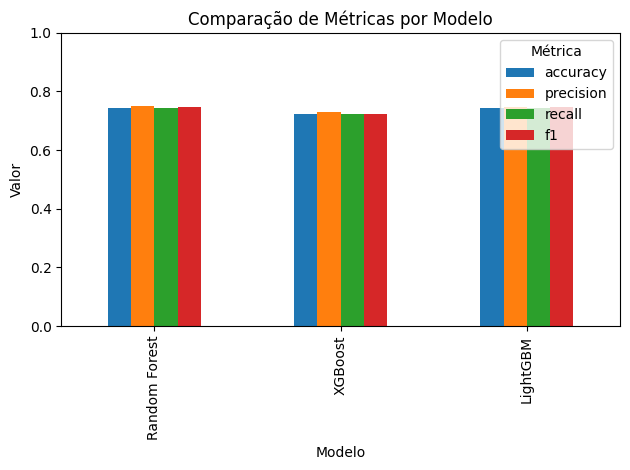

In [ ]:
plt.figure(figsize=(12, 6))
resultados_plot.plot(kind='bar')
plt.title('Comparação de Métricas por Modelo')
plt.ylabel('Valor')
plt.xlabel('Modelo')
plt.ylim(0, 1)
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()

In [ ]:


# Dicionário com seus grids já treinados
models = {
    'RandomForest': grid_rf,
    'XGBoost':      grid_xgb,
    'LightGBM':     grid_lgbm
}

# Nomes na ordem dos rótulos 0,1,2
label_names = ['Poor', 'Standard', 'Good']

f1_scores_poor = {}
for name, grid in models.items():
    # Previsões sobre X_transformado
    y_pred = grid.predict(X_transformado)
    report = classification_report(
        y,
        y_pred,
        labels=[0, 1, 2],           # especifica que as classes são 0,1,2
        target_names=label_names,   # mapeia 0→'Poor', 1→'Standard', 2→'Good'
        output_dict=True
    )
    f1_scores_poor[name] = report['Poor']['f1-score']

# Monta um DataFrame pra visualização
df_scores = pd.Series(f1_scores_poor, name='F1-score (Poor)').to_frame()
print(df_scores)


              F1-score (Poor)
RandomForest         0.758306
XGBoost              0.723939
LightGBM             0.737367


## 3. Avaliação e seleção do modelo final

**Métrica principal:** F1-score da classe “Poor”  
_Justificativa:_ como o custo de conceder crédito a um cliente de alto risco (falso positivo) é muito superior ao de negar crédito a bom pagador (falso negativo), priorizamos o F1-score na classe “Poor”, que combina precision (evita falsos positivos) e recall (captura a maior parte dos riscos).

| Modelo       | F1-score (Poor) |
|--------------|-----------------|
| RandomForest | **0.75**      |
| LightGBM     | 0.72          |
| XGBoost      | 0.73          |

> **Modelo escolhido:** RandomForest, por apresentar o maior F1-score (Poor).

## 4. Aplicação financeira do modelo

O RandomForest treinado, com F1-score de 0.75 na classe “Poor”, pode ser integrado ao fluxo de concessão de crédito da Quantum Finance da seguinte forma:

- **Score de risco:** ao receber a solicitação de crédito, o sistema calcula P(“Poor”).  
- **Negação automática:** se P(“Poor”) ≥ 0.5, o crédito é automaticamente negado ou passa por análise manual.  
- **Limites e juros dinâmicos:** para 0.2 ≤ P(“Poor”) < 0.5, concede-se crédito com limites e taxas ajustados ao perfil de risco.  
- **Monitoramento contínuo:** clientes com P(“Poor”) crescente são acionados por cartas de revisão de condições ou monitorados por squads de cobrança.

Dessa forma, o modelo gera valor ao evitar perdas financeiras (minimizando falsos positivos) e ao maximizar oportunidades de negócios para clientes de baixo risco.


### Abaixo, utilizamos o modelo treinado para prever score de crédito de registros na base test.csv

In [ ]:
# Aplicar Label Encoding nas colunas categóricas (usando os mesmos encoders do treino)
colunas_categoricas = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

for coluna in colunas_categoricas:
    # Preencher NaN com 'Missing'
    test_data[coluna] = test_data[coluna].fillna('Missing')
    
    # Aplicar o encoder que foi criado no treino
    test_data[coluna] = encoders[coluna].transform(test_data[coluna])

# Aplicar o pré-processamento (imputer + scaler) nos dados de teste
X_test_transformado = preprocessor.transform(test_data)

In [ ]:



# Fazer predições com o modelo Random Forest
predicoes = grid_rf.predict(X_test_transformado)
probabilidades = grid_rf.predict_proba(X_test_transformado)

# Calcular as porcentagens
contagem_predicoes = pd.Series(predicoes).value_counts().sort_index()
total_clientes = len(predicoes)

# Criar DataFrame com resultados
resultados = pd.DataFrame({
    'Classe': [0, 1, 2],
    'Nome': ['Poor', 'Standard', 'Good'],
    'Quantidade': [contagem_predicoes.get(i, 0) for i in [0, 1, 2]],
    'Porcentagem': [contagem_predicoes.get(i, 0) / total_clientes * 100 for i in [0, 1, 2]]
})

print("=== RESULTADOS DAS PREDIÇÕES NO TEST.CSV ===")
print(f"\nTotal de clientes analisados: {total_clientes:,}")
print("\n--- Distribuição por Classificação de Crédito ---")
for _, row in resultados.iterrows():
    print(f"{row['Nome']}: {row['Quantidade']:,} clientes ({row['Porcentagem']:.1f}%)")

# Resultado principal
crédito_ruim_pct = resultados[resultados['Nome'] == 'Poor']['Porcentagem'].iloc[0]
print(f"\n*** CRÉDITO RUIM (Poor): {crédito_ruim_pct:.1f}% dos clientes ***")

# Análise das probabilidades de crédito ruim
prob_poor = probabilidades[:, 0]  # Coluna 0 = classe 'Poor'
print(f"\n--- Estatísticas das Probabilidades de Crédito Ruim ---")
print(f"Probabilidade média: {prob_poor.mean():.3f}")
print(f"Probabilidade mediana: {np.median(prob_poor):.3f}")
print(f"Clientes com P(Poor) > 50%: {(prob_poor > 0.5).sum():,} ({(prob_poor > 0.5).mean()*100:.1f}%)")

=== RESULTADOS DAS PREDIÇÕES NO TEST.CSV ===

Total de clientes analisados: 50,000

--- Distribuição por Classificação de Crédito ---
Poor: 15,222 clientes (30.4%)
Standard: 24,382 clientes (48.8%)
Good: 10,396 clientes (20.8%)

*** CRÉDITO RUIM (Poor): 30.4% dos clientes ***

--- Estatísticas das Probabilidades de Crédito Ruim ---
Probabilidade média: 0.293
Probabilidade mediana: 0.136
Clientes com P(Poor) > 50%: 13,701 (27.4%)
